1)

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
X,Y= make_moons(n_samples=10000,noise=0.4)
print(X[:2],'\n**************\n',Y[:2])

[[-0.48249073  0.69267228]
 [-0.78890681 -0.13375297]] 
**************
 [0 0]


In [2]:
pd.Series(Y).value_counts()

0    5000
1    5000
Name: count, dtype: int64

Lets see how the data set looks like

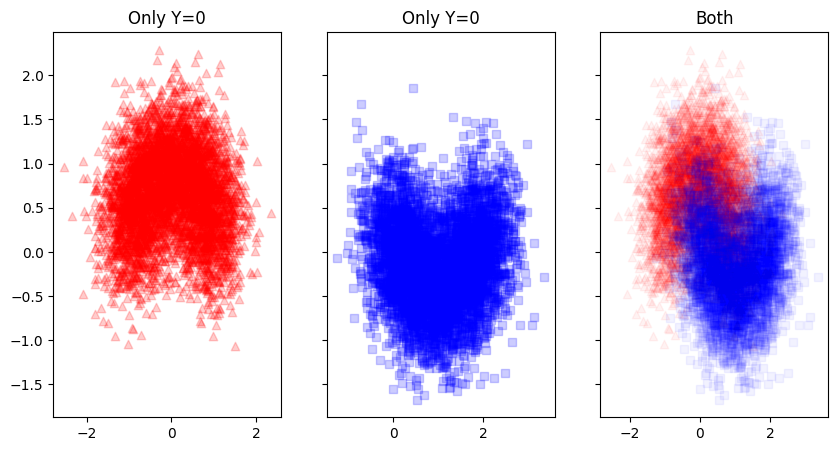

In [3]:
fig,axs=plt.subplots(ncols=3,sharey=True,figsize=(10,5))

plt.sca(axs[0])
plt.title("Only Y=0")
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.2)

plt.sca(axs[1])
plt.title("Only Y=0")
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.2)

plt.sca(axs[2])
plt.title("Both")
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.05)
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.05)

plt.show()


the data are largely overlapped but not at the exact co-ordinates. this is due to larget value of noise at: X,Y= make_moons(n_samples=10000,noise=0.4)


choosing the best parameters for Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
params={
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [2,6,10],
    'min_samples_leaf': [1,5,9],
    'max_features': [1,5,9],
    'max_leaf_nodes':[5,10,15,20,25] 
}
gs=GridSearchCV(estimator=dtc,param_grid=params,cv=3)

In [5]:
gs.fit(X,Y)
model = gs.best_estimator_
print("Best_Params:",gs.best_params_)
print("Best_Score=",gs.best_score_)

Best_Params: {'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': 25, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best_Score= 0.8592006171223


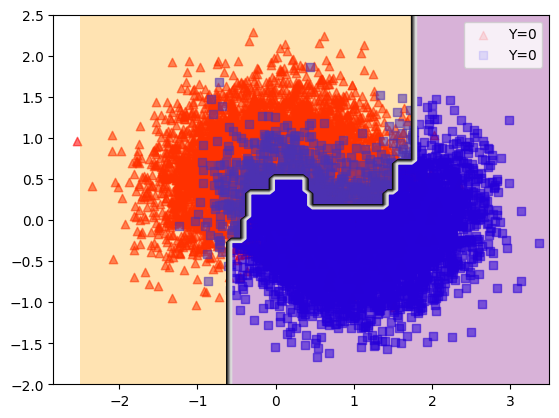

In [6]:
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.1,label="Y=0")
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.1,label="Y=0")
X1,X2=np.meshgrid(np.linspace(-2.5,3.5,100),np.linspace(-2,2.5,100))
X_new=np.c_[X1.ravel(),X2.ravel()]
pred_new = model.predict(X_new).reshape(X1.shape)
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],color="red",marker='^',alpha=0.5)
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color="blue",marker='s',alpha=0.5)
plt.contourf(X1,X2,pred_new,cmap=ListedColormap(['orange','purple']),alpha=0.3)
plt.legend()
plt.contour(X1,X2,pred_new,cmap="grey")
plt.show()


As we can see above that the one orange region is for Y==0 and purple region is for Y==1

2) 

In [7]:
from sklearn.model_selection import ShuffleSplit
trainXs=[]
trainYs=[]
testx=[]
testy=[]
trees=[]
splitter = ShuffleSplit(n_splits=1000,train_size=0.01,test_size=0.0001)
for trainind,testind in splitter.split(X=X,y=Y):
    trainXs.append(X[trainind])
    trainYs.append(Y[trainind])
    testx.append(X[testind])
    testy.append(Y[testind])
trainXs=np.array(trainXs)
trainYs=np.array(trainYs)
testx=np.array(testx)
testy=np.array(testy)

In [8]:
for i in range(1000):
    model.fit(trainXs[i],trainYs[i])
    trees.append(model)
testy=testy.reshape(1000,1)
testx=testx.reshape(1000,2)

In [45]:
from scipy.stats import mode
def random_forest(to_predict):
    predict_all=[]
    for i in range(len(to_predict)):
        predict_each=[]
        for j in range(len(trees)):
            predict_each.append(trees[j].predict(to_predict[[i]]))
        predict_all.append(mode(predict_each)[0])
    return predict_all    
        

In [46]:
random_forest(testx[:100])

[array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),

we are done designing the functionality of random forest, now lets convert it into a transformer

In [197]:
from sklearn.base import TransformerMixin,BaseEstimator
class RandomForesetMoon(TransformerMixin,BaseEstimator):
    def __init__(self,model):
        self.model =model
    def fit(self,X,Y):
        trainXs=[]
        trainYs=[]
        splitter = ShuffleSplit(n_splits=1000,train_size=0.01,test_size=0.0001)
        for trainind,testind in splitter.split(X=X,y=Y):
            trainXs.append(X[trainind])
            trainYs.append(Y[trainind])
        trainXs=np.array(trainXs)
        trainYs=np.array(trainYs)
        self.trees=[]
        for i in range(len(trainXs)):
            self.model.fit(trainXs[i],trainYs[i])
            self.trees.append(self.model)
        return self
    def predict(self,X):
        self.predict_all=[]
        for i in range(len(X)):
            predict_each=[]
            for j in range(len(trees)):
                predict_each.append(trees[j].predict(X[[i]]))
            self.predict_all.append((mode(predict_each)[0]))
        self.predict_all=np.array(self.predict_all) 
        return self.predict_all
    
    def predict_proba(self,X):
        self.predict_proba_all=[]
        for i in range(len(X)):
            predict_proba_each=[]
            for j in range(len(trees)):
                predict_proba_each.append(trees[j].predict_proba(X[[i]])[0])
            self.predict_proba_all.append(mode(predict_proba_each)[0])
        self.predict_proba_all=np.array(self.predict_proba_all)
        return self.predict_proba_all
        


In [198]:
rfc= RandomForesetMoon(model)
rfc.fit(X,Y)
predicts=rfc.predict(testx[:100])

In [199]:
from sklearn.metrics import accuracy_score
print("Accuracy of RandomForest",accuracy_score(testy[:100],predicts))

Accuracy of RandomForest 0.82


The accuracy is slightly lower than that of the DecisionTree, lets compare 

In [153]:
#where the predict proba was designed and tested before integrating
# predict_all=[]
# predict_proba_all=[]
# for i in range(len(X[:10])):
#     predict_each=[]
#     predict_proba_each=[]
#     for j in range(len(trees)):
#         predict_each.append(trees[j].predict(X[[i]]))
#         predict_proba_each.append(trees[j].predict_proba(X[[i]])[0])
#     predict_proba_all.append(mode(predict_proba_each)[0])
#     predict_all.append((mode(predict_each)[0]))
# predict_proba_all=np.array(predict_proba_all)
# predict_all=np.array(predict_all)